In [1]:
# Importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [5]:
# Calling the DataFrame

df = pd.read_csv("fandango_scrape.csv")
df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [6]:
df.tail()

,FILM,STARS,RATING,VOTES
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0
503,Zarafa (2012),0.0,0.0,0


In [7]:
df.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

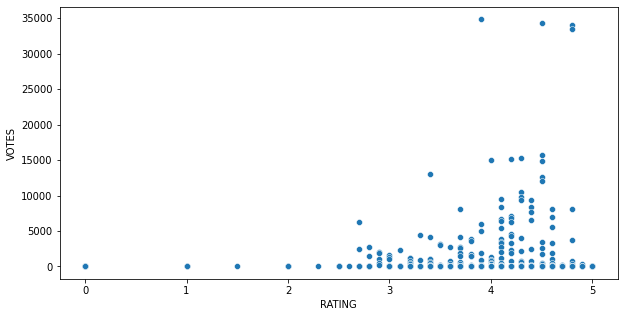

In [10]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='RATING', y='VOTES')

In [31]:
# Correlation Matrix

corr = df.corr()
corr

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


<AxesSubplot:>

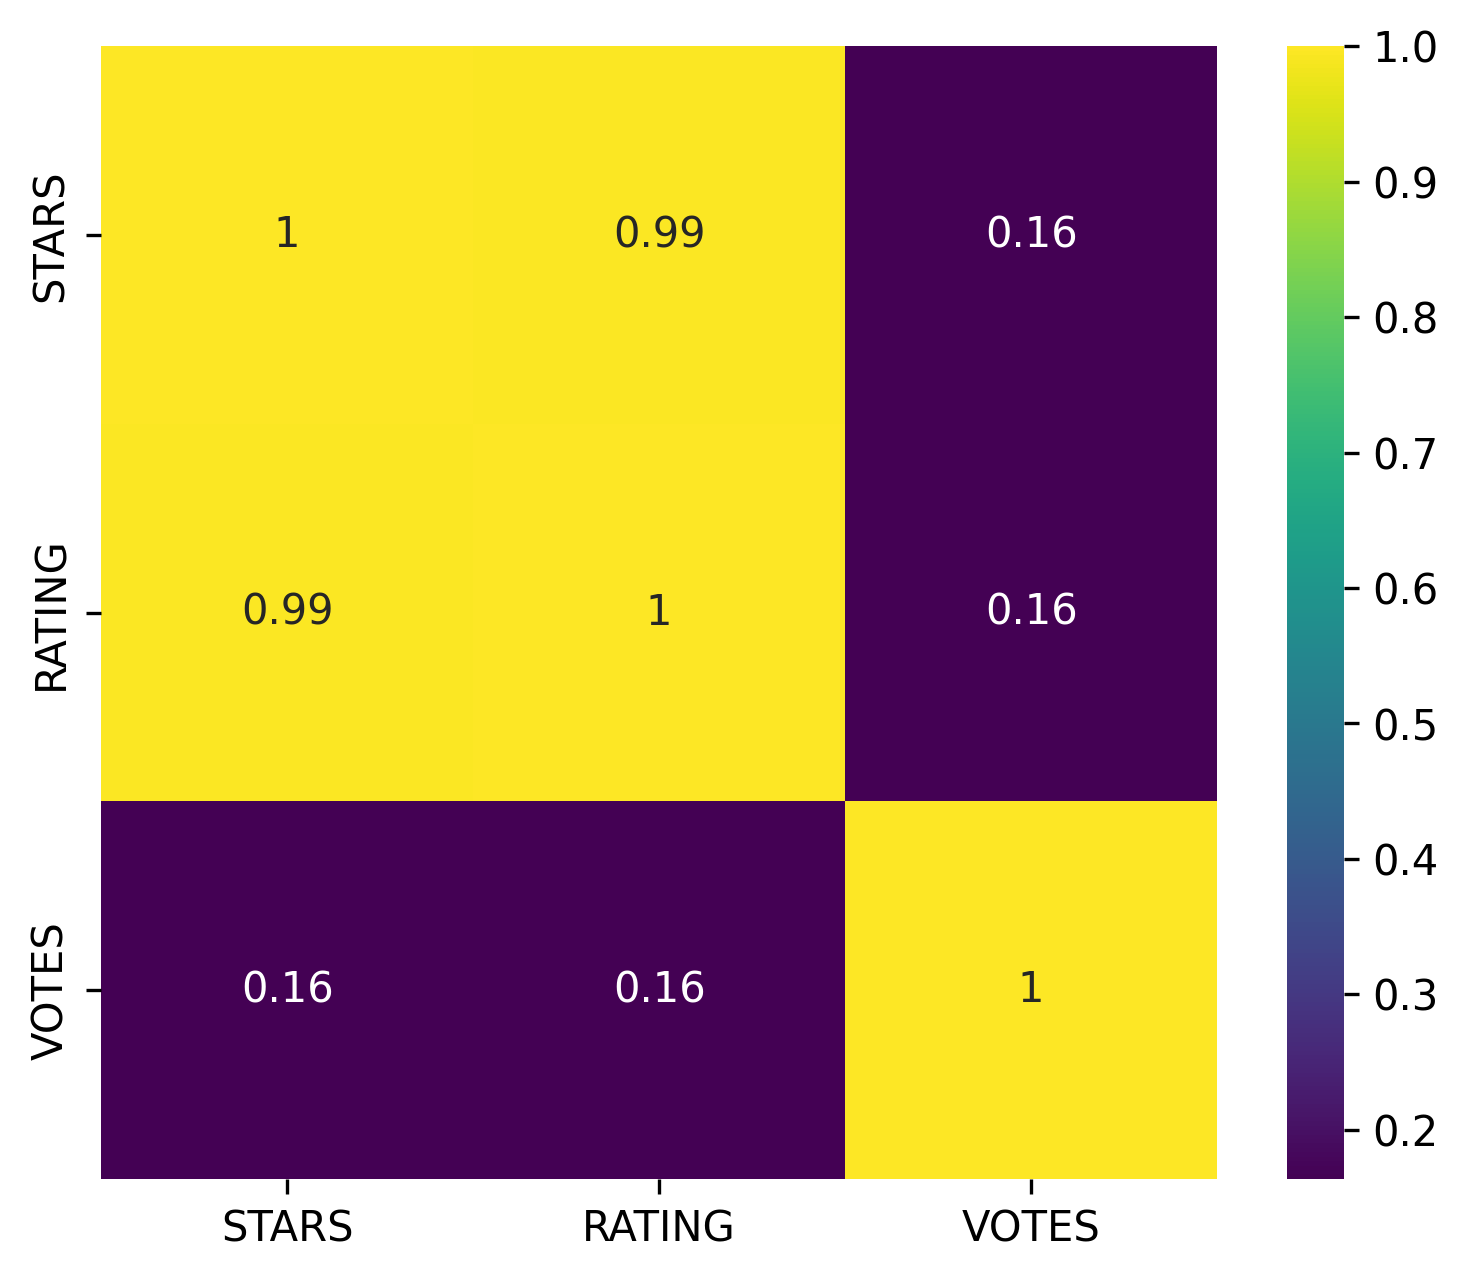

In [49]:
# Visualizing the Correlation Matrix

plt.figure(figsize=(6, 5), dpi=300)
sns.heatmap(data=corr, annot=True, cmap='viridis')

In [50]:
df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [51]:
# Extracting year from the 'FILM' column

df['Year'] = df['FILM'].apply(lambda x: x.split('(')[-1].split(')')[0])
df.head()

,FILM,STARS,RATING,VOTES,Year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [52]:
df.tail()

,FILM,STARS,RATING,VOTES,Year
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964
503,Zarafa (2012),0.0,0.0,0,2012


In [53]:
# Getting the counts from Year column

df['Year'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

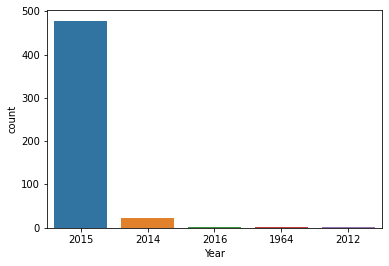

In [54]:
# Visually representing the count

sns.countplot(data=df, x='Year')

In [55]:
df.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,Year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [58]:
len(df[df['VOTES'] == 0])

69

In [61]:
# Not cosidering 0 Votes

only_review = df[df['VOTES'] > 0]
only_review.shape, df.shape

((435, 5), (504, 5))

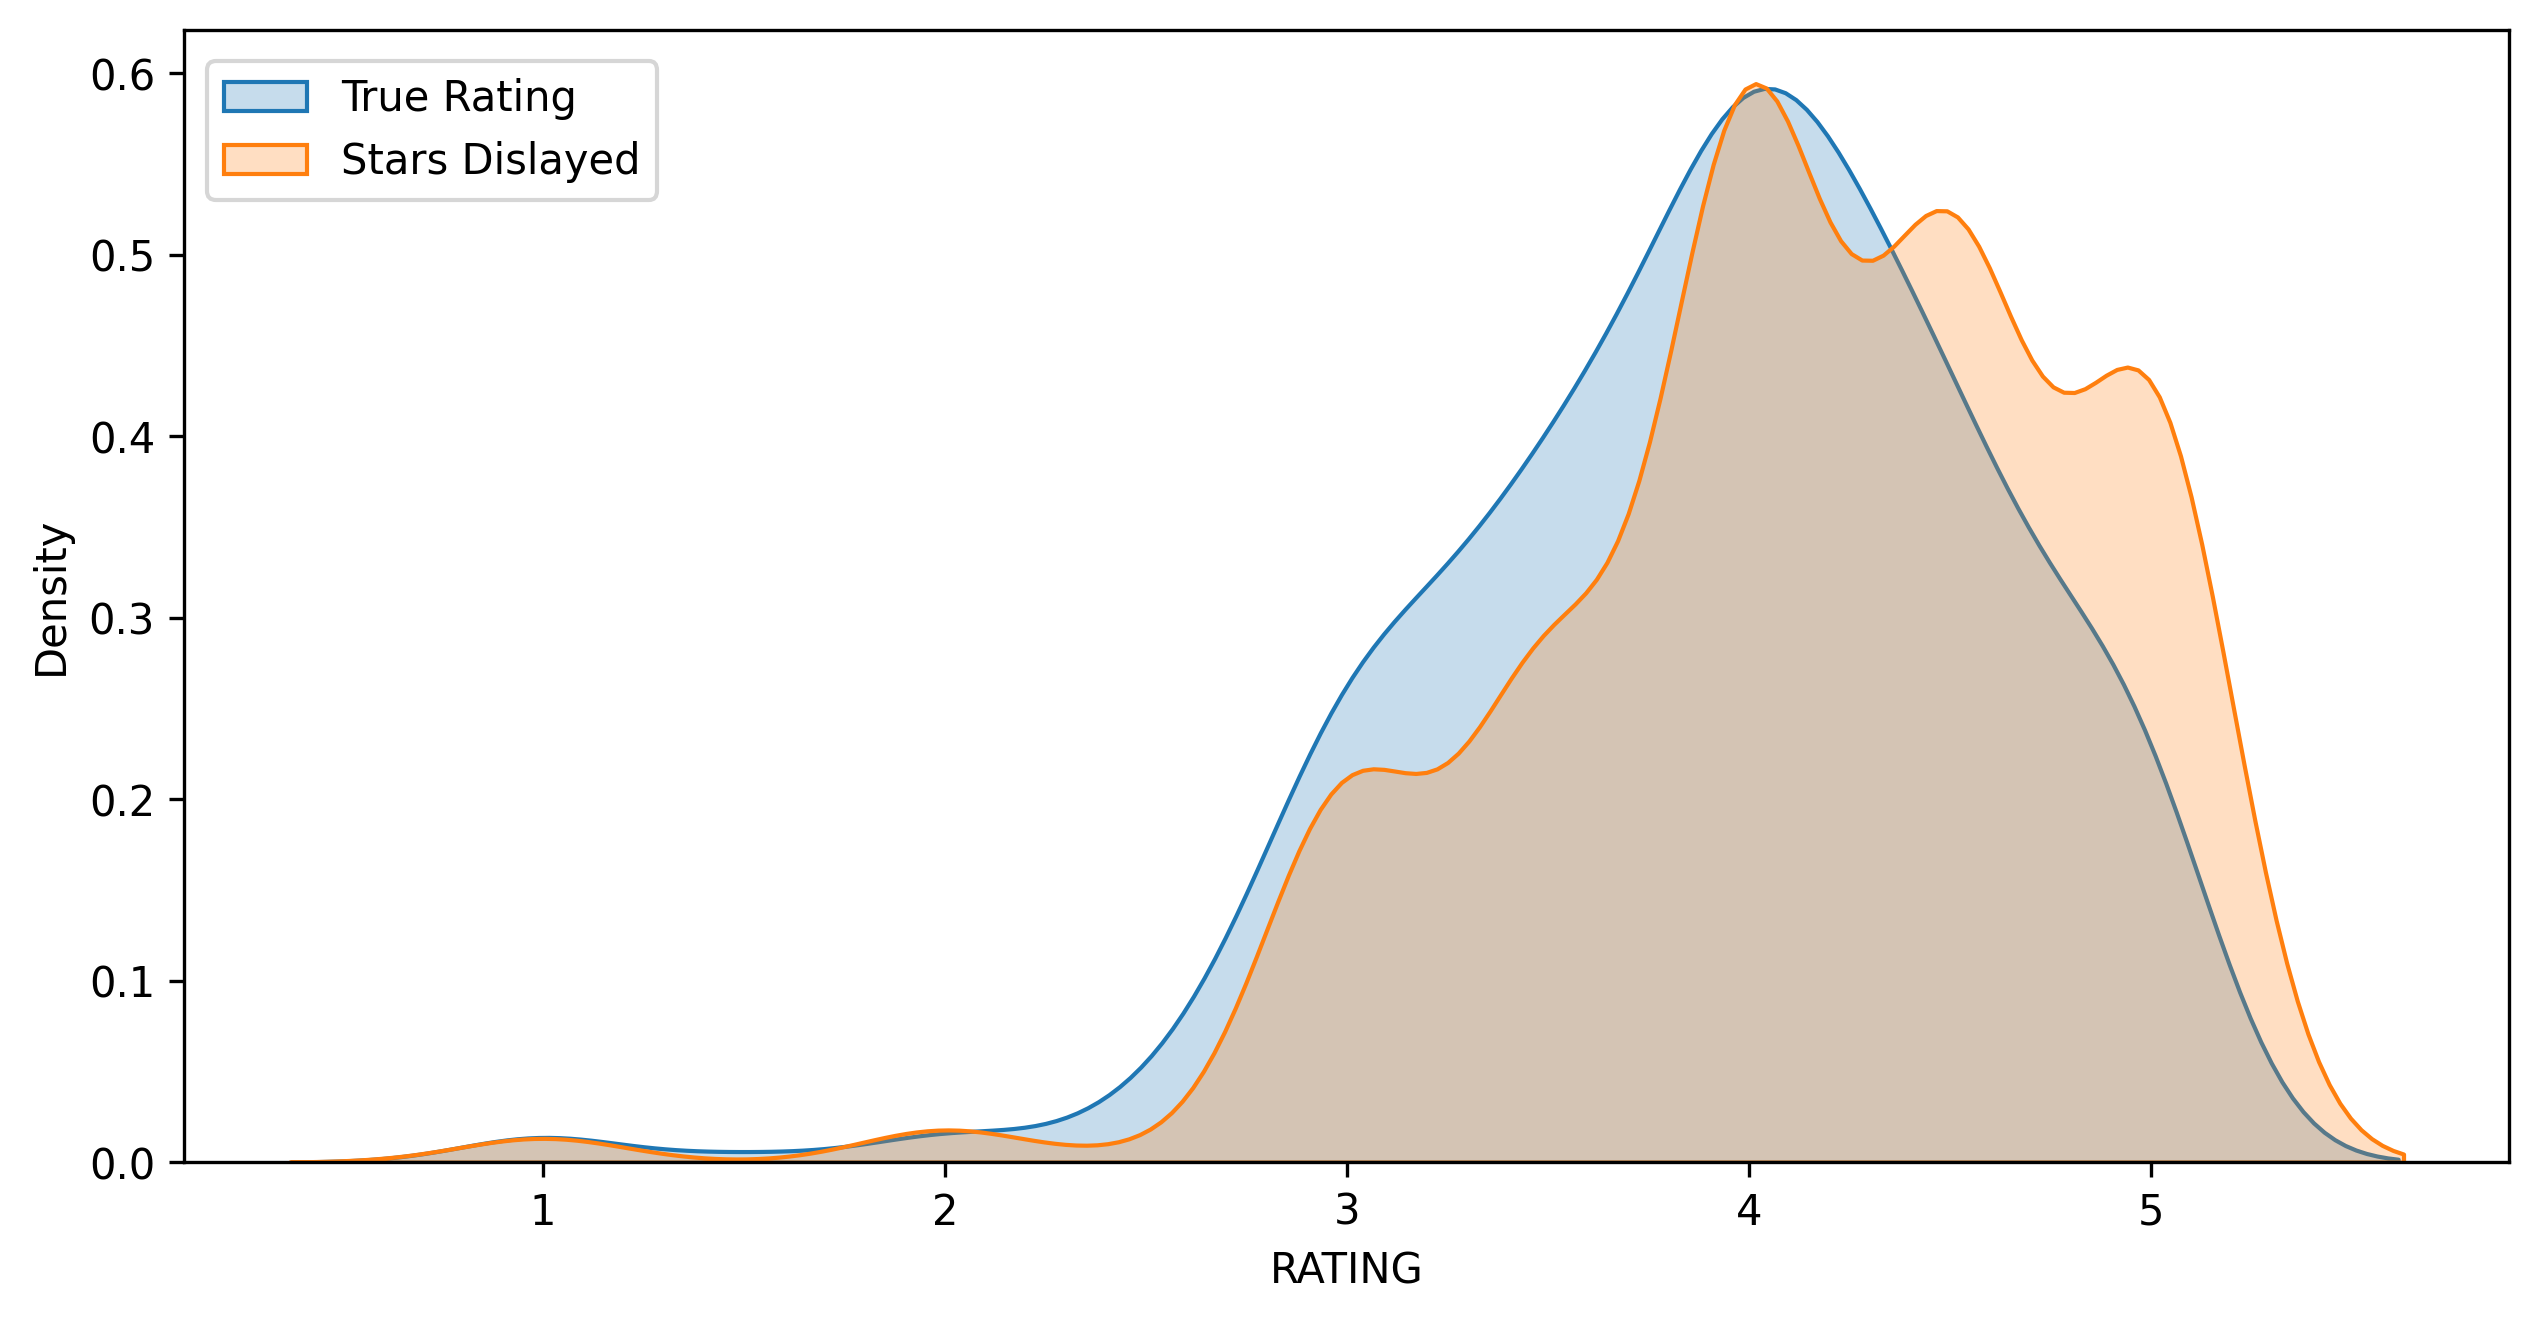

In [62]:
# KDE plots

plt.figure(figsize=(10, 5), dpi=300)

sns.kdeplot(data=only_review, x='RATING', label='True Rating', fill=True)
sns.kdeplot(data=only_review, x='STARS', label='Stars Dislayed', fill=True)

plt.legend(loc=(0.01, 0.85))